# Baixando Base


CÉLULA 1 - Importação da base e descompressão do arquivo da base.

In [87]:
import os
#instalando o kaggle
!pip install kaggle

#baixando o dataset
!kaggle datasets download -d arbazkhan971/cuhk-face-sketch-database-cufs --force
#descompactando
!unzip -oq "cuhk-face-sketch-database-cufs.zip"

def list_files_in_folder(folder_path):
  """Lista os arquivos da pasta fornecida."""
  try:
    file_list = os.listdir(folder_path)
    return file_list
  except FileNotFoundError:
    print(f"Error: Folder not found at {folder_path}")
    return []

photos_folder = "photos"
files_in_photos = list_files_in_folder(photos_folder)

Dataset URL: https://www.kaggle.com/datasets/arbazkhan971/cuhk-face-sketch-database-cufs
License(s): copyright-authors
 99% 112M/113M [00:01<00:00, 94.3MB/s]
100% 113M/113M [00:01<00:00, 86.7MB/s]


CÉLULA 2 - Listando os arquivos contidos na pasta 'photos'


In [88]:
print(files_in_photos)
print(len(files_in_photos))

['f-020-01.jpg', 'f-016-01.jpg', 'm1-021-01.jpg', 'm-021-01.jpg', 'm-009-01.jpg', 'm-045-01.jpg', 'm-074-01.jpg', 'm-076-01.jpg', 'f1-011-01.jpg', 'm1-022-01.jpg', 'f1-009-01.jpg', 'f-017-01.jpg', 'm-055-01.jpg', 'm-031-01.jpg', 'm-093-01.jpg', 'm-037-01.jpg', 'f-007-01.jpg', 'm-094-01.jpg', 'm1-011-01.jpg', 'f1-013-01.jpg', 'm-044-01.jpg', 'f-015-01.jpg', 'm-081-01.jpg', 'f-022-01.jpg', 'm-090-01.jpg', 'm1-014-01.jpg', 'f-032-01.jpg', 'm-030-01.jpg', 'm1-002-01.jpg', 'm-026-01.jpg', 'f1-014-01.jpg', 'f-012-01.jpg', 'f-010-01.jpg', 'm-028-01.jpg', 'm-010-01.jpg', 'f1-008-01.jpg', 'm-100-01.jpg', 'm-099-01.jpg', 'f-034-01.jpg', 'm1-007-01.jpg', 'm-068-01.jpg', 'm-018-01.jpg', 'm1-005-01.jpg', 'm1-027-01.jpg', 'm1-018-01.jpg', 'm1-033-01.jpg', 'm-082-01.jpg', 'm-096-01.jpg', 'm1-031-01.jpg', 'm-058-01.jpg', 'f-027-01.jpg', 'm1-006-01.jpg', 'm-095-01.jpg', 'f-026-01.jpg', 'f-037-01.jpg', 'm-069-01.jpg', 'm-091-01.jpg', 'm-036-01.jpg', 'm-089-01.jpg', 'm1-034-01.jpg', 'f-011-01.jpg', 'm1-0

CÉLULA 3 - Exibindo algumas imagens. 5 primeiras nesse caso. Ordem aleatória, então não conte que seja sempre as primeiras imagens.

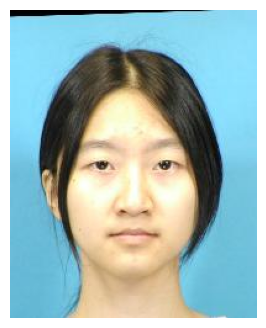

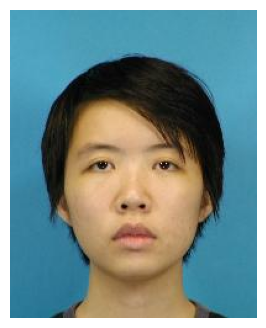

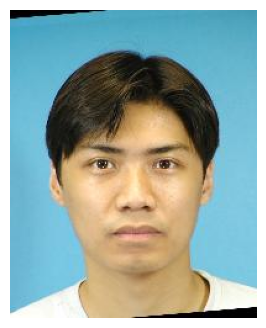

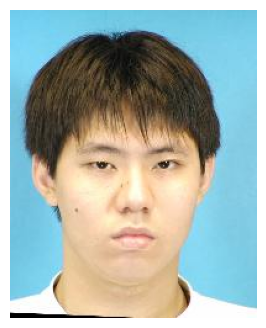

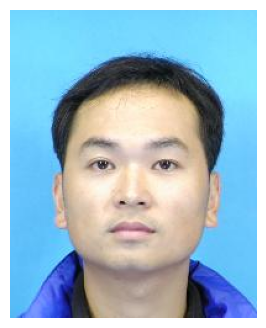

In [89]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Função para carregar e exibir algumas imagens
def display_images_from_folder(folder_path, num_images=5):
    # Lista os arquivos da pasta
    files = os.listdir(folder_path)
    # Exibe as primeiras `num_images` imagens
    for i in range(min(num_images, len(files))):
        img_path = os.path.join(folder_path, files[i])
        img = mpimg.imread(img_path)
        plt.figure(figsize=(4,4))
        plt.imshow(img)
        plt.axis('off')  # Desativa os eixos
        plt.show()

# Exemplo de visualização das primeiras 5 imagens
display_images_from_folder('photos', num_images=5)


# Pré processamento das imagens

CÉLULA 4 - Observando a base de dados se percebe que os nomes dos arquivos começam com 'm' para masculino e 'f' para feminino. Então pensando nisso foi criado labels das categorias com esses prefixos.

In [90]:
# Função para gerar rótulos baseados nos nomes dos arquivos
def create_labels(file_list):
    labels = []
    for file in file_list:
        # Verifica se o nome do arquivo comeca com 'm' ou 'f'. Se sim, atribui 0 (Masculino) ou 1 (Feminino)
        if file.startswith('m'):  # Masculino
            labels.append(0)
        elif file.startswith('f'):  # Feminino
            labels.append(1)
    return labels

# Gerar rótulos baseados nos nomes dos arquivos
labels = create_labels(files_in_photos)


CÉLULA 5 - Importa-se biblioteca PIL (importante para manipulação de imagens). Redimensiona imagens para 250 por 200 (requisito). Normaliza colocando entre 0 e 1 dividindo 255. Mas é uma função para uma imagem. Deve-se colocar em um laço para percorrer todas imagens.


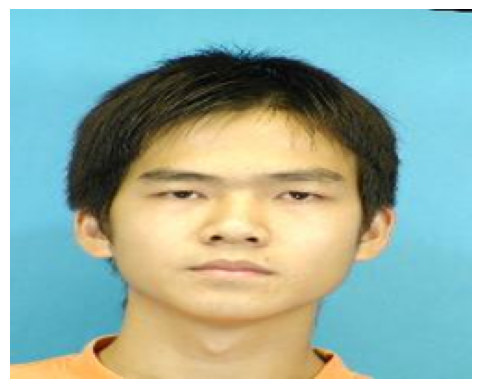

In [91]:
from PIL import Image
import numpy as np

# Função para redimensionar e normalizar imagens
def preprocess_image(image_path, target_size=(250, 200)):
    img = Image.open(image_path)
    img = img.resize(target_size)  # Redimensiona a imagem
    img_array = np.array(img) / 255.0  # Normaliza a imagem (converte para valores no intervalo [0, 1])
    return img_array

# Exemplo de pré-processamento de uma imagem
# Observe que a imagem deu uma 'achatadinha'
# A imagem do rapaz de camisa laranja
img_array = preprocess_image('photos/m-014-01.jpg')
plt.imshow(img_array)
plt.axis('off')
plt.show()


CÉLULA 6 - Reescrevendo nossa função preprocess_images. Agora para receber uma pasta, uma lista de arquivos e um tamanho para redimensionar. Aplicando em um conjunto de imagens. De novo importando a PIL.

In [92]:
import numpy as np
from PIL import Image
import os

# Função para pré-processar imagens (redimensionar e normalizar)
def preprocess_images(folder_path, file_list, target_size=(250, 200)):
    img_arrays = []
    # Redimensiona e normaliza as imagens
    for file in file_list:
        img_path = os.path.join(folder_path, file)
        img = Image.open(img_path)
        img = img.resize(target_size)  # Redimensiona para 250x200
        img_array = np.array(img) / 255.0  # Normaliza os valores RGB para [0, 1]
        img_arrays.append(img_array)
    return np.array(img_arrays)

# Carregar e pré-processar as imagens. Retorna um array de imagens (250, 200) normalizadas
img_arrays = preprocess_images('photos', files_in_photos)


# Preparando para treino. Separando teste, validação, treino

CÉLULA 7 - Um dos requisitos foi uma divisão de treino, teste e validação: "50% para o conjunto de treinamento, 30% para o conjunto de validação, e 20% para o conjunto de teste: reservado para avaliar o desempenho final do modelo.Para garantir que todos os residentes trabalhem com os mesmos conjuntos de dados, utilize a seed 23 ao realizar a divisão".


In [93]:
from sklearn.model_selection import train_test_split

# Dividir as imagens em conjuntos de treinamento, validação e teste
# Passamos imagens e rótulos e dividimos em conjuntos de treinamento, validação e teste
# Tiramos 50% para o conjunto de treinamento e 50% para o conjunto para o resto
X_train, X_temp, y_train, y_temp = train_test_split(img_arrays, labels, test_size=0.5, random_state=23)
# Do resto, tiramos 30% para o conjunto de validação e 20% para o conjunto de teste
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=23)  # 0.4 de 0.5 é 30%

# Vamos conferir?
print(f"Treinamento: {len(X_train)} imagens")
print(f"Validação: {len(X_val)} imagens")
print(f"Teste: {len(X_test)} imagens")


Treinamento: 94 imagens
Validação: 56 imagens
Teste: 38 imagens


CÉLULA 8 - Analisamos a consistencia dos dados. Pode haver um arquivo com nome que começa com 'm' no 1 ou 'f' no 0.

In [94]:
# Função para verificar a consistência dos rótulos
def check_label_consistency(file_list, labels):
    inconsistencies = []  # Lista para armazenar inconsistências
    for i, file in enumerate(file_list):
        expected_label = 0 if file.startswith('m') else 1  # Determina o rótulo esperado com base no nome do arquivo
        if labels[i] != expected_label:
            inconsistencies.append((file, labels[i], expected_label))  # Armazena o nome do arquivo e os rótulos esperados e atribuídos
    return inconsistencies

# Chama a função para verificar as inconsistências
inconsistencies = check_label_consistency(files_in_photos, labels)

# Exibe as inconsistências encontradas
if inconsistencies:
    print("Inconsistências encontradas nos rótulos:")
    for item in inconsistencies:
        print(f"Arquivo: {item[0]}, Rótulo Atribuído: {item[1]}, Rótulo Esperado: {item[2]}")
else:
    print("Todos os rótulos estão consistentes com os nomes dos arquivos.")


Todos os rótulos estão consistentes com os nomes dos arquivos.


# Criando Modelos

CÉLULA 9 - Criando o primeiro modelo. Com 9 camadas. 3 pares de convolucionais com MaxPooling. Perceba que os filtros são multiplicados por 2 a cada camada.

In [99]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.metrics import AUC, Precision, Recall, Accuracy
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

# Criação do modelo CNN
model_9 = models.Sequential()

# Camadas convolucionais e pooling
model_9.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 200, 3)))
model_9.add(layers.MaxPooling2D((2, 2)))
model_9.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_9.add(layers.MaxPooling2D((2, 2)))
model_9.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_9.add(layers.MaxPooling2D((2, 2)))

# Camadas densas
model_9.add(layers.Flatten())
model_9.add(layers.Dense(128, activation='relu'))
model_9.add(layers.Dense(1, activation='sigmoid'))

# Compilação do modelo
model_9.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

# Resumo do modelo
model_9.summary()



Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)                   │ (None, 248, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 124, 99, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 122, 97, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 61, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 59, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 29, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 85376)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │      10,928,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,021,633 (42.04 MB)

 Trainable params: 11,021,633 (42.04 MB)

 Non-trainable params: 0 (0.00 B)

CÉLULA 9.1 - Testando modelos em diferentes formatos e camadas



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Criação do modelo CNN
model_9_1 = models.Sequential()

# Camada convolucional 1: 32 filtros, tamanho de kernel 3x3, ativação ReLU
model_9_1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 200, 3)))
model_9_1.add(layers.MaxPooling2D((2, 2)))  # Camada de pooling (redução de dimensões)

# Camada convolucional 2: 64 filtros, tamanho de kernel 3x3, ativação ReLU
model_9_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_9_1.add(layers.MaxPooling2D((2, 2)))

# Camada convolucional 3: 128 filtros, tamanho de kernel 3x3, ativação ReLU
model_9_1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_9_1.add(layers.MaxPooling2D((2, 2)))

# Achatar a saída da última camada de pooling para conectar com a camada densa
model_9_1.add(layers.Flatten())

# Camada densa totalmente conectada com 64 neurônios e ativação ReLU
model_9_1.add(layers.Dense(64, activation='relu'))

# Camada de Dropout para evitar overfitting
model_9_1.add(layers.Dropout(0.5))  # Taxa de dropout de 50%

# Camada de saída com 1 neurônio (usando sigmoid para classificação binária)
model_9_1.add(layers.Dense(1, activation='sigmoid'))

# Compilação do modelo
model_9_1.compile(optimizer='adam',
              loss='binary_crossentropy',  # Para classificação binária
              metrics=['accuracy'])

# Resumo do modelo
model_9_1.summary()



CÉLULA 10 -  Utilizando OpenCV para redimensionar as imagens após alguns erros


In [101]:
import numpy as np
import cv2  # Usando OpenCV para redimensionar imagens
from tensorflow.keras.preprocessing.image import img_to_array

# Redimensionando as imagens diretamente
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])

# Verifique as dimensões após redimensionamento
print(f"Novo formato de X_train: {X_train_resized.shape}")

# Certifique-se de normalizar as imagens
X_train_resized = X_train_resized / 255.0  # Normalizando as imagens para o intervalo [0, 1]

# Agora, você pode continuar com o treinamento


Novo formato de X_train: (94, 224, 224, 3)


CÉLULA 11


In [102]:
import numpy as np

# Verifique se X_train_resized é um np.array
X_train_resized = np.array(X_train_resized)

# Verifique o shape de X_train_resized
print(X_train_resized.shape)

# Se os valores estiverem entre 0 e 1, podemos normalizar dividindo por 255
# Caso contrário, normalize os dados para a faixa [0, 1]
X_train_resized = X_train_resized / 255.0

# Verifique novamente
print(X_train_resized.shape)

# Se necessário, adicione uma dimensão extra (se estiver lidando com imagens monocromáticas ou em outro formato)
# Por exemplo, para uma imagem de 128x128 e 3 canais (RGB), o shape seria (128, 128, 3)
# Caso contrário, se estiver lidando com 1 canal (escala de cinza), use (altura, largura, 1)


(94, 224, 224, 3)
(94, 224, 224, 3)


# Treinando Modelo Multiclasse

CÉLULA 12


In [103]:
# Importar bibliotecas necessárias
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical

# Convertendo os rótulos para um formato adequado para a classificação multi-classe
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Redefinir as imagens para ter a forma correta (n_samples, height, width, channels)
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

# Criar um modelo simples de CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 250, 3)),  # Camada convolucional com 32 filtros
    layers.MaxPooling2D((2, 2)),  # Camada de pooling para reduzir as dimensões
    layers.Conv2D(64, (3, 3), activation='relu'),  # Mais uma camada convolucional
    layers.MaxPooling2D((2, 2)),  # Outra camada de pooling
    layers.Conv2D(128, (3, 3), activation='relu'),  # Outra camada convolucional
    layers.MaxPooling2D((2, 2)),  # Outra camada de pooling
    layers.Flatten(),  # Flatten para transformar a imagem em um vetor
    layers.Dense(128, activation='relu'),  # Camada densa
    layers.Dense(2, activation='softmax')  # Camada de saída com softmax (2 classes: Masculino e Feminino)
])

# Compilando o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinamento do modelo
history = model.fit(
    X_train, y_train,  # Dados de treinamento e rótulos
    epochs=10,  # Defina o número de épocas
    validation_data=(X_val, y_val)  # Dados de validação
)

# Avaliar o modelo nos dados de teste
test_loss, test_acc = model.evaluate(X_test, y_test)  # Dados de teste
print(f"Test accuracy: {test_acc:.4f}")


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 6s/step - accuracy: 0.5152 - loss: 2.2806 - val_accuracy: 0.2679 - val_loss: 1.3436
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - accuracy: 0.3956 - loss: 1.3545 - val_accuracy: 0.7321 - val_loss: 0.5851
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 5s/step - accuracy: 0.7051 - loss: 0.6148 - val_accuracy: 0.7679 - val_loss: 0.6871
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.8073 - loss: 0.6197 - val_accuracy: 0.7321 - val_loss: 0.6196
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.7488 - loss: 0.5411 - val_accuracy: 0.7321 - val_loss: 0.5839
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.7608 - loss: 0.5338 - val_accuracy: 0.6607 - val_loss: 0.6674
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 40s 7s/step - accuracy: 0.8055 - loss: 0.4315 - val_accuracy: 0.7500 - val_loss: 0.5542
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.8133 - loss: 0.4143 - val_accuracy: 0.7143 - val_loss: 0.6551
Epoch 9/

CÉLULA 13.1 - Avaliando uma nova configuração de modelo com parametros ajustados com sigmoid

In [104]:
from tensorflow.keras import layers, models

# Modelo com camadas ajustadas (exemplo)
model_13_1 = models.Sequential([
    layers.InputLayer(input_shape=(250, 200, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Saída binária
])

model_13_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_13_1 = model_13_1.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.5698 - loss: 1.7355 - val_accuracy: 0.7321 - val_loss: 0.6518
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6941 - loss: 0.6324 - val_accuracy: 0.7321 - val_loss: 0.5681
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.7390 - loss: 0.5369 - val_accuracy: 0.8571 - val_loss: 0.6527
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.7485 - loss: 0.5397 - val_accuracy: 0.7321 - val_loss: 0.5436
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.8478 - loss: 0.3635 - val_accuracy: 0.7321 - val_loss: 0.5236
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8115 - loss: 0.3980 - val_accuracy: 0.7321 - val_loss: 0.5334
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.8539 - loss: 0.3689 - val_accuracy: 0.7679 - val_loss: 0.5724
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.8713 - loss: 0.3216 - val_accuracy: 0.7321 - val_loss: 0.4909
Epoch 9/

CÉLULA 13.2 - Usando regularização com fuções de ativação distintas

In [ ]:
# Modelo com regularização (Dropout) e diferentes funções de ativação
model_13_2 = models.Sequential([
    layers.InputLayer(input_shape=(250, 200, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Regularização com Dropout
    layers.Dense(1, activation='sigmoid')  # Saída binária
])

model_13_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_13_2 = model_13_2.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.4686 - loss: 5.2171 - val_accuracy: 0.7143 - val_loss: 1.4937
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6878 - loss: 1.4318 - val_accuracy: 0.7143 - val_loss: 0.5202
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.6935 - loss: 0.5906 - val_accuracy: 0.7143 - val_loss: 0.5932
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.7930 - loss: 0.4663 - val_accuracy: 0.8393 - val_loss: 0.4308
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.8985 - loss: 0.3001 - val_accuracy: 0.8929 - val_loss: 0.4006
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9456 - loss: 0.2319 - val_accuracy: 0.8036 - val_loss: 0.5015
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9242 - loss: 0.1893 - val_accuracy: 0.8750 - val_loss: 0.4194
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.9442 - loss: 0.1364 - val_accuracy: 0.8571 - val_loss: 0.4986
Epoch 9/

CELULA 13.3 - Usando data argumentation para fazer variabilidade dos dados. Principalmente por causa da desigualdade entre quantidade de dados de Feminino comparado ao Masculino

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation para aumentar a variabilidade dos dados de treino
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generator de treino com Data Augmentation
train_generator = train_datagen.flow(X_train, y_train, batch_size=16)

# Modelo com Dropout
model_13_3 = models.Sequential([
    layers.InputLayer(input_shape=(250, 200, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Regularização Dropout

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Regularização Dropout

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Regularização Dropout
    layers.Dense(1, activation='sigmoid')
])

# Compilação do modelo
model_13_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinamento
history_13_3 = model_13_3.fit(
    train_generator,
    epochs=15,  # Menos épocas para evitar overfitting
    validation_data=(X_val, y_val)
)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.7258 - loss: 0.6651 - val_accuracy: 0.7143 - val_loss: 10.6370
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7549 - loss: 0.6240 - val_accuracy: 0.7143 - val_loss: 13.0339
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.7427 - loss: 0.6165 - val_accuracy: 0.7143 - val_loss: 13.2814
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7182 - loss: 0.5952 - val_accuracy: 0.7143 - val_loss: 13.5805
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.7458 - loss: 0.5818 - val_accuracy: 0.7143 - val_loss: 13.5133
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.6770 - loss: 0.6781 - val_accuracy: 0.7143 - val_loss: 12.5826
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7281 - loss: 0.6066 - val_accuracy: 0.7143 - val_loss: 13.1351
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.7294 - loss: 0.6112 - val_accuracy: 0.7143 - val_loss: 10.0546
Epoch 9/15


CÉLULA 13.4 - Usando Batch Normalization entre camadas. Mudando quantidade de epocas e tamanho do batch_size

In [ ]:
from tensorflow.keras.layers import BatchNormalization

# Modelo com menos camadas e Batch Normalization
model_13_4 = models.Sequential([
    layers.InputLayer(input_shape=(250, 200, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),  # Normalização das ativações
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),  # Normalização das ativações
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),  # Normalização das ativações
    layers.Dense(1, activation='sigmoid')
])

# Compilação do modelo
model_13_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinamento
history_13_4 = model_13_4.fit(
    X_train, y_train,
    epochs=15,  # Usando menos épocas
    batch_size=32,  # Tamanho de batch maior
    validation_data=(X_val, y_val)
)


Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 7s/step - accuracy: 0.4896 - loss: 0.8770 - val_accuracy: 0.7679 - val_loss: 1.2519
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 34s 5s/step - accuracy: 0.9776 - loss: 0.1828 - val_accuracy: 0.7679 - val_loss: 1.6205
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 8s/step - accuracy: 0.9567 - loss: 0.1873 - val_accuracy: 0.7679 - val_loss: 1.5792
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 6s/step - accuracy: 0.9908 - loss: 0.1417 - val_accuracy: 0.7857 - val_loss: 1.4088
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - accuracy: 0.9382 - loss: 0.1765 - val_accuracy: 0.8214 - val_loss: 1.2116
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 9s/step - accuracy: 0.9840 - loss: 0.1126 - val_accuracy: 0.8036 - val_loss: 1.0246
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step - accuracy: 0.9659 - loss: 0.1126 - val_accuracy: 0.8393 - val_loss: 0.8373
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.9776 - loss: 0.1005 - val_accuracy: 0.8036 - val_loss: 0.6925
Epoch 9/

CELULA 13.5 - Usando dropout para correção de pesos e usando data argumentation de novo

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configurar Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Normaliza as imagens para o intervalo [0, 1]
    rotation_range=30,  # Rotaciona até 30 graus
    width_shift_range=0.2,  # Deslocamento horizontal
    height_shift_range=0.2,  # Deslocamento vertical
    shear_range=0.2,  # Cisalhamento
    zoom_range=0.2,  # Zoom
    horizontal_flip=True,  # Flip horizontal
    fill_mode='nearest'  # Preenchimento para pixels vazios após transformações
)

# Aumentar os dados de treino
datagen.fit(X_train)

# Modelo CNN com Dropout
model_13_5 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(250, 200, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularização com Dropout

    Dense(1, activation='sigmoid')  # Saída binária (0 ou 1)
])

# Compilação do modelo
model_13_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinamento do modelo com Data Augmentation
history_13_5 = model_13_5.fit(
    datagen.flow(X_train, y_train, batch_size=32),  # Usar o Data Augmentation para gerar lotes
    epochs=10,  # Número de épocas
    validation_data=(X_val, y_val)  # Dados de validação
)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.5754 - loss: 0.6778 - val_accuracy: 0.7143 - val_loss: 16.8508
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.7225 - loss: 0.6156 - val_accuracy: 0.7143 - val_loss: 13.8566
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.7694 - loss: 0.5895 - val_accuracy: 0.7143 - val_loss: 19.3878
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.7125 - loss: 0.6460 - val_accuracy: 0.7143 - val_loss: 16.5405
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.7649 - loss: 0.5501 - val_accuracy: 0.7143 - val_loss: 17.6339
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 6s/step - accuracy: 0.7303 - loss: 0.5808 - val_accuracy: 0.7143 - val_loss: 17.2838
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.7123 - loss: 0.5874 - val_accuracy: 0.7143 - val_loss: 17.0923
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.7319 - loss: 0.5848 - val_accuracy: 0.7143 - val_loss: 17.7512


CÉLULA 13.6

In [ ]:
from tensorflow.keras.layers import BatchNormalization

# Modelo CNN com Batch Normalization e Dropout
model_13_6 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(250, 200, 3)),
    BatchNormalization(),  # Normaliza as ativações da camada Conv2D
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),  # Normaliza as ativações da camada Conv2D
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularização com Dropout

    Dense(1, activation='sigmoid')  # Saída binária (0 ou 1)
])

# Compilação do modelo
model_13_6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinamento do modelo com Data Augmentation
history_13_6 = model_13_6.fit(
    datagen.flow(X_train, y_train, batch_size=32),  # Usar o Data Augmentation para gerar lotes
    epochs=10,  # Número de épocas
    validation_data=(X_val, y_val)  # Dados de validação
)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 8s/step - accuracy: 0.6504 - loss: 1.7667 - val_accuracy: 0.2857 - val_loss: 2.1637
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 6s/step - accuracy: 0.5113 - loss: 2.0761 - val_accuracy: 0.2857 - val_loss: 2.2117
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - accuracy: 0.7591 - loss: 0.6535 - val_accuracy: 0.2857 - val_loss: 1.7940
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 8s/step - accuracy: 0.7466 - loss: 0.5917 - val_accuracy: 0.2857 - val_loss: 1.8020
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 42s 7s/step - accuracy: 0.8202 - loss: 0.4568 - val_accuracy: 0.2857 - val_loss: 1.9424
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 39s 6s/step - accuracy: 0.7652 - loss: 0.6291 - val_accuracy: 0.2857 - val_loss: 2.6085
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 7s/step - accuracy: 0.7019 - loss: 0.4995 - val_accuracy: 0.2857 - val_loss: 3.3249
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.7979 - loss: 0.4441 - val_accuracy: 0.2857 - val_loss: 3.7209
Epoch 9/

CÉLULA 13.7 -  Substituindo o Flatten por Global Average Pooling

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D

# Modelo CNN com Global Average Pooling e Dropout
model_13_7 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(250, 200, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Substituindo o Flatten por Global Average Pooling
    GlobalAveragePooling2D(),  # Reduz para um único valor médio por canal

    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularização com Dropout

    Dense(1, activation='sigmoid')  # Saída binária (0 ou 1)
])

# Compilação do modelo
model_13_7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinamento do modelo com Data Augmentation
history_13_7 = model_13_7.fit(
    datagen.flow(X_train, y_train, batch_size=32),  # Usar o Data Augmentation para gerar lotes
    epochs=10,  # Número de épocas
    validation_data=(X_val, y_val)  # Dados de validação
)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.4971 - loss: 0.6921 - val_accuracy: 0.7143 - val_loss: 0.6506
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.7163 - loss: 0.6870 - val_accuracy: 0.7143 - val_loss: 0.6132
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.7400 - loss: 0.6796 - val_accuracy: 0.7143 - val_loss: 0.5894
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.7303 - loss: 0.6713 - val_accuracy: 0.7143 - val_loss: 0.6225
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.7381 - loss: 0.6604 - val_accuracy: 0.7143 - val_loss: 0.7748
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.7498 - loss: 0.6470 - val_accuracy: 0.7143 - val_loss: 1.0965
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.7485 - loss: 0.6220 - val_accuracy: 0.7143 - val_loss: 1.5989
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.7235 - loss: 0.6156 - val_accuracy: 0.7143 - val_loss: 2.2883
Epoch 9/

CÉLULA 14 - Criando modelo semelhante a celula 12. Readequando os dados para não ocorrer nenhum tipo de erro pela memória. Usa-se cross validation. Faz uma média das réplicas. Usa se função ativação softmax

Treinando no Fold 1
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.6826 - loss: 3.4155 - val_accuracy: 0.3158 - val_loss: 4.1568
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.3018 - loss: 3.1742 - val_accuracy: 0.6842 - val_loss: 0.6291
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.6649 - loss: 0.6058 - val_accuracy: 0.6842 - val_loss: 0.5561
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.6736 - loss: 0.5772 - val_accuracy: 0.8947 - val_loss: 0.4949
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.7895 - loss: 0.4721 - val_accuracy: 0.6842 - val_loss: 0.4402
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.8129 - loss: 0.4674 - val_accuracy: 0.6842 - val_loss: 0.4674
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.7739 - loss: 0.5460 - val_accuracy: 0.6842 - val_loss: 0.4875
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.8079 - loss: 0.4266 - val_accuracy: 0.8421 - val_l

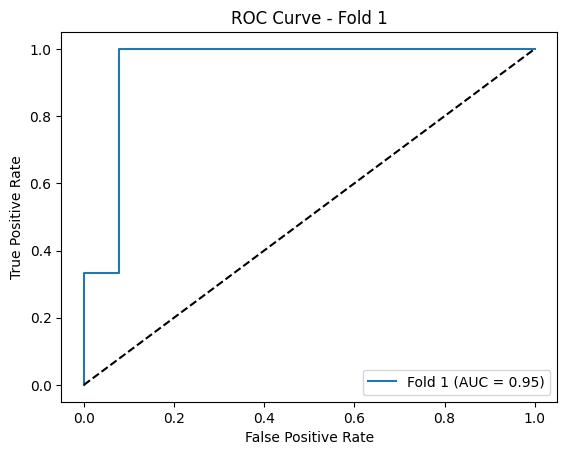

Treinando no Fold 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.4447 - loss: 4.2036 - val_accuracy: 0.3158 - val_loss: 1.3977
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.3852 - loss: 1.0885 - val_accuracy: 0.6842 - val_loss: 0.6909
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.6826 - loss: 0.7020 - val_accuracy: 0.6842 - val_loss: 0.6144
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.6943 - loss: 0.5995 - val_accuracy: 0.6842 - val_loss: 0.5851
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.7021 - loss: 0.5649 - val_accuracy: 0.7895 - val_loss: 0.5388
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.7272 - loss: 0.5366 - val_accuracy: 0.7368 - val_loss: 0.4563
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7617 - loss: 0.4769 - val_accuracy: 0.8421 - val_loss: 0.3903
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - accuracy: 0.8642 - loss: 0.4034 - val_accuracy: 0.8421 - val_loss: 0.3485
Epoch 9/

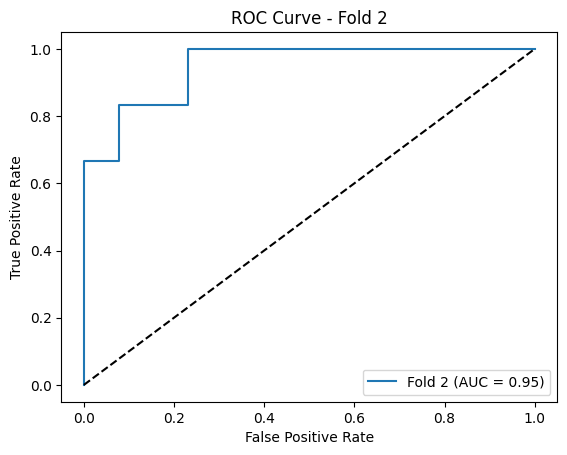

Treinando no Fold 3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.4854 - loss: 2.6554 - val_accuracy: 0.1579 - val_loss: 1.8017
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.4075 - loss: 1.1180 - val_accuracy: 0.8421 - val_loss: 0.4473
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6665 - loss: 0.7030 - val_accuracy: 0.8421 - val_loss: 0.5752
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.6548 - loss: 0.6281 - val_accuracy: 0.8421 - val_loss: 0.5007
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.6815 - loss: 0.6008 - val_accuracy: 0.8947 - val_loss: 0.4464
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.7957 - loss: 0.5368 - val_accuracy: 0.8421 - val_loss: 0.4623
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.8419 - loss: 0.4711 - val_accuracy: 0.8421 - val_loss: 0.3925
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.8524 - loss: 0.4104 - val_accuracy: 0.8421 - val_loss: 0.4945
Epoch 9/1

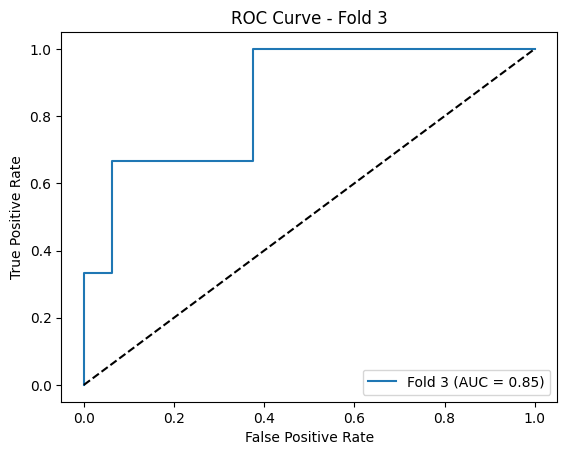

Treinando no Fold 4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.4185 - loss: 3.4408 - val_accuracy: 0.3158 - val_loss: 2.2679
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.3486 - loss: 1.5058 - val_accuracy: 0.6842 - val_loss: 0.6246
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.6787 - loss: 0.6420 - val_accuracy: 0.6842 - val_loss: 0.5773
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7104 - loss: 0.5949 - val_accuracy: 0.6842 - val_loss: 0.7251
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.6697 - loss: 0.7295 - val_accuracy: 0.8947 - val_loss: 0.4293
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.8375 - loss: 0.4278 - val_accuracy: 0.8421 - val_loss: 0.3490
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.8564 - loss: 0.3785 - val_accuracy: 0.7895 - val_loss: 0.3183
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8485 - loss: 0.3509 - val_accuracy: 0.8947 - val_loss: 0.3396
Epoch 9/

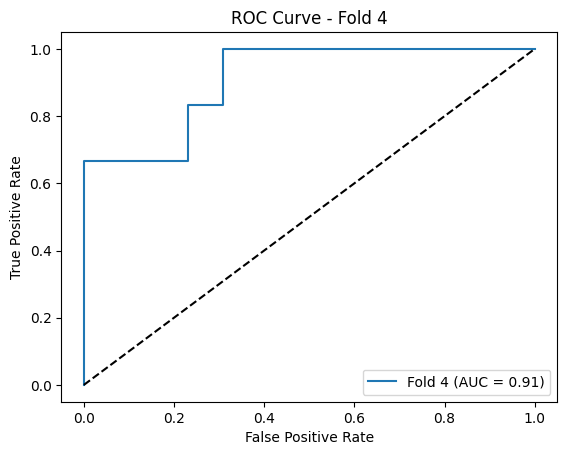

Treinando no Fold 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.7407 - loss: 4.3570 - val_accuracy: 0.4444 - val_loss: 1.1820
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.3261 - loss: 1.1576 - val_accuracy: 0.5556 - val_loss: 1.0299
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.7564 - loss: 0.6017 - val_accuracy: 0.5556 - val_loss: 0.6845
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.7017 - loss: 0.5919 - val_accuracy: 0.5556 - val_loss: 0.7541
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.7134 - loss: 0.5435 - val_accuracy: 0.5556 - val_loss: 0.8094
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.7671 - loss: 0.4909 - val_accuracy: 0.7222 - val_loss: 0.6495
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.8625 - loss: 0.4284 - val_accuracy: 0.7222 - val_loss: 0.7314
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.8534 - loss: 0.3723 - val_accuracy: 0.6667 - val_loss: 0.9897
Epoch 9/

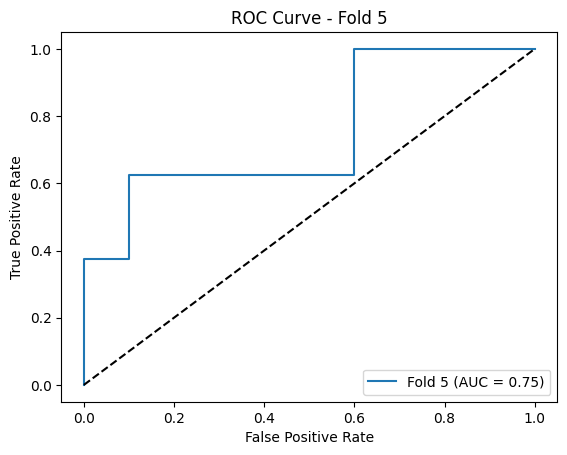


Média de Acurácia após Validação Cruzada: 0.8175
Média de Perda após Validação Cruzada: 0.4721
Média de F1-Score após Validação Cruzada: 0.6376
Média de AUC-ROC após Validação Cruzada: 0.8824


InvalidArgumentError: Graph execution error:

Detected at node sequential_21_1/flatten_21_1/Reshape defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-105-56962e613cfb>", line 97, in <cell line: 97>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 433, in evaluate

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 165, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 154, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 82, in test_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 901, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 212, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 175, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 560, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 901, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py", line 54, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/numpy.py", line 4440, in reshape

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/numpy.py", line 1789, in reshape

Only one input size may be -1, not both 0 and 1
	 [[{{node sequential_21_1/flatten_21_1/Reshape}}]] [Op:__inference_one_step_on_iterator_38062]

In [105]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import label_binarize

# Função para criar o modelo (igual ao da Célula 12)
def criar_modelo():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 250, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Preparação dos dados
X_train = np.array(X_train)  # Dados de entrada para treinamento
y_train = np.array(y_train)  # Rótulos para o treinamento
X_val = np.array(X_val)  # Dados de validação
y_val = np.array(y_val)  # Rótulos de validação
X_test = np.array(X_test)  # Dados de teste
y_test = np.array(y_test)  # Rótulos de teste

# Número de folds para a validação cruzada
k = 5  # Número de divisões dos dados
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Listas para armazenar as métricas de cada fold
acuracias = []
perdas = []
f1_scores = []
roc_aucs = []

# Iniciar o loop de validação cruzada
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"Treinando no Fold {fold + 1}")

    # Divida os dados de treino e validação para este fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Criar e treinar o modelo
    modelo = criar_modelo()  # Criação do modelo
    modelo.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_val_fold, y_val_fold))

    # Avaliar o modelo no conjunto de validação
    loss, accuracy = modelo.evaluate(X_val_fold, y_val_fold)
    acuracias.append(accuracy)
    perdas.append(loss)

    # Previsões no conjunto de validação
    y_val_pred = modelo.predict(X_val_fold)
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)  # Classe com maior probabilidade

    # Calcular o F1-Score
    f1 = f1_score(y_val_fold, y_val_pred_classes)
    f1_scores.append(f1)

    # Calcular o AUC-ROC
    y_val_fold_bin = label_binarize(y_val_fold, classes=[0, 1])  # Binarizar os rótulos
    fpr, tpr, _ = roc_curve(y_val_fold_bin, y_val_pred[:, 1])  # Calcular FPR e TPR
    roc_auc = auc(fpr, tpr)
    roc_aucs.append(roc_auc)

    # Plotar a curva ROC para cada fold
    plt.figure(fold)
    plt.plot(fpr, tpr, label=f'Fold {fold+1} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Fold {fold+1}')
    plt.legend(loc="lower right")
    plt.show()

# Calcular a média das métricas
media_acuracia = np.mean(acuracias)
media_perda = np.mean(perdas)
media_f1 = np.mean(f1_scores)
media_roc_auc = np.mean(roc_aucs)

print(f'\nMédia de Acurácia após Validação Cruzada: {media_acuracia:.4f}')
print(f'Média de Perda após Validação Cruzada: {media_perda:.4f}')
print(f'Média de F1-Score após Validação Cruzada: {media_f1:.4f}')
print(f'Média de AUC-ROC após Validação Cruzada: {media_roc_auc:.4f}')

# Opcional: Avaliar o modelo no conjunto de teste
test_loss, test_acc = modelo.evaluate(X_test, y_test)
test_pred = modelo.predict(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)

# Calcular F1-Score e AUC-ROC no conjunto de teste
test_f1 = f1_score(y_test, test_pred_classes)
test_y_test_bin = label_binarize(y_test, classes=[0, 1])
fpr_test, tpr_test, _ = roc_curve(test_y_test_bin, test_pred[:, 1])
test_roc_auc = auc(fpr_test, tpr_test)

print(f'\nAcurácia no conjunto de teste: {test_acc:.4f}')
print(f'F1-Score no conjunto de teste: {test_f1:.4f}')
print(f'AUC-ROC no conjunto de teste: {test_roc_auc:.4f}')


CÉLULA 15.1 - nesse modelo é usado a função sigmoid.

Treinando no Fold 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.6549 - loss: 1.2058 - val_accuracy: 0.1579 - val_loss: 0.9002
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.4645 - loss: 0.7437 - val_accuracy: 0.8421 - val_loss: 0.4455
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7060 - loss: 0.6125 - val_accuracy: 0.8421 - val_loss: 0.5112
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7199 - loss: 0.5729 - val_accuracy: 0.8421 - val_loss: 0.4538
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6904 - loss: 0.5580 - val_accuracy: 0.8421 - val_loss: 0.4244
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.7225 - loss: 0.4865 - val_accuracy: 0.8421 - val_loss: 0.5065
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7356 - loss: 0.4783 - val_accuracy: 0.8421 - val_loss: 0.3717
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7147 - loss: 0.4042 - val_accuracy: 0.8421 - val_loss: 0.2900
Epoch 9/

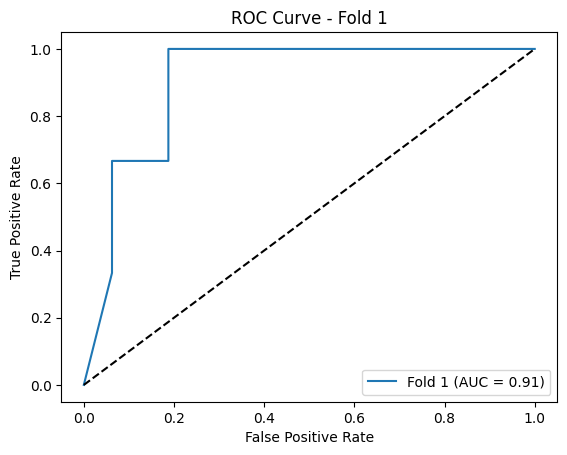

Treinando no Fold 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6258 - loss: 2.2154 - val_accuracy: 0.2105 - val_loss: 0.7100
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5011 - loss: 0.6883 - val_accuracy: 0.7895 - val_loss: 0.6006
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7235 - loss: 0.6120 - val_accuracy: 0.7895 - val_loss: 0.5097
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.7027 - loss: 0.6134 - val_accuracy: 0.7895 - val_loss: 0.5158
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7322 - loss: 0.5615 - val_accuracy: 0.7895 - val_loss: 0.4974
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7044 - loss: 0.5746 - val_accuracy: 0.7895 - val_loss: 0.4820
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7339 - loss: 0.5171 - val_accuracy: 0.7895 - val_loss: 0.4399
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6802 - loss: 0.5089 - val_accuracy: 0.7895 - val_loss: 0.3733
Epoch 9/

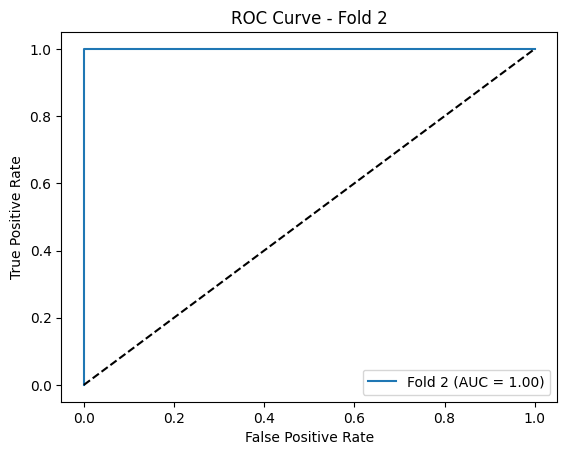

Treinando no Fold 3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4951 - loss: 1.0391 - val_accuracy: 0.7368 - val_loss: 0.5652
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7427 - loss: 0.5261 - val_accuracy: 0.7368 - val_loss: 0.5650
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8582 - loss: 0.5056 - val_accuracy: 0.7368 - val_loss: 0.5743
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7815 - loss: 0.4183 - val_accuracy: 0.7895 - val_loss: 0.4380
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9405 - loss: 0.2441 - val_accuracy: 0.7895 - val_loss: 0.5643
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9578 - loss: 0.1501 - val_accuracy: 0.7895 - val_loss: 0.5517
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9511 - loss: 0.2392 - val_accuracy: 0.7895 - val_loss: 0.5483
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9432 - loss: 0.1651 - val_accuracy: 0.8421 - val_loss: 0.7179
Epoch 9/

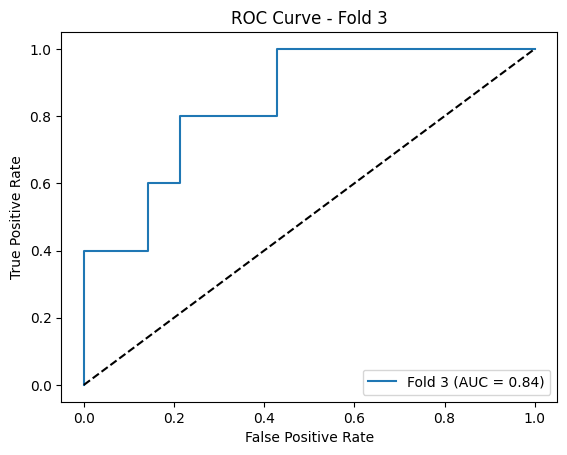

Treinando no Fold 4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5114 - loss: 0.7609 - val_accuracy: 0.6316 - val_loss: 0.7450
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7377 - loss: 0.5684 - val_accuracy: 0.6316 - val_loss: 0.7034
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7858 - loss: 0.4294 - val_accuracy: 0.8947 - val_loss: 0.4422
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9036 - loss: 0.3075 - val_accuracy: 0.7895 - val_loss: 0.5191
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8898 - loss: 0.2896 - val_accuracy: 0.8421 - val_loss: 0.3835
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9406 - loss: 0.2423 - val_accuracy: 0.6842 - val_loss: 1.0899
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9440 - loss: 0.2108 - val_accuracy: 0.8421 - val_loss: 0.2597
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9510 - loss: 0.1008 - val_accuracy: 0.8421 - val_loss: 0.3579
Epoch 9/10

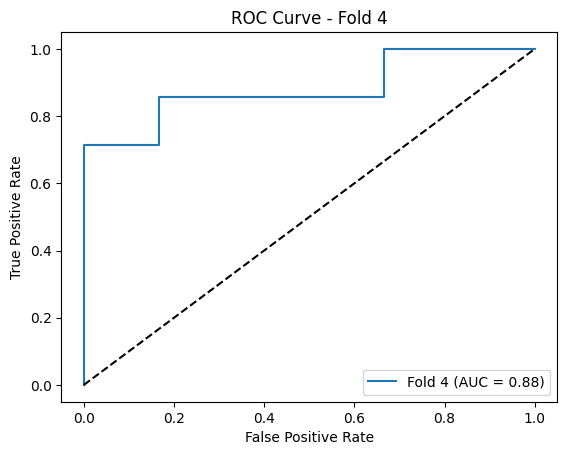

Treinando no Fold 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7644 - loss: 0.9564 - val_accuracy: 0.6667 - val_loss: 0.6872
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.7248 - loss: 0.6773 - val_accuracy: 0.6667 - val_loss: 0.6475
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7578 - loss: 0.5904 - val_accuracy: 0.6667 - val_loss: 0.6911
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7352 - loss: 0.5909 - val_accuracy: 0.6667 - val_loss: 0.6409
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7457 - loss: 0.5455 - val_accuracy: 0.6667 - val_loss: 0.6248
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7795 - loss: 0.5164 - val_accuracy: 0.6667 - val_loss: 0.6135
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.7578 - loss: 0.5261 - val_accuracy: 0.6667 - val_loss: 0.5920
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7552 - loss: 0.5144 - val_accuracy: 0.6667 - val_loss: 0.5742
Epoch 9/

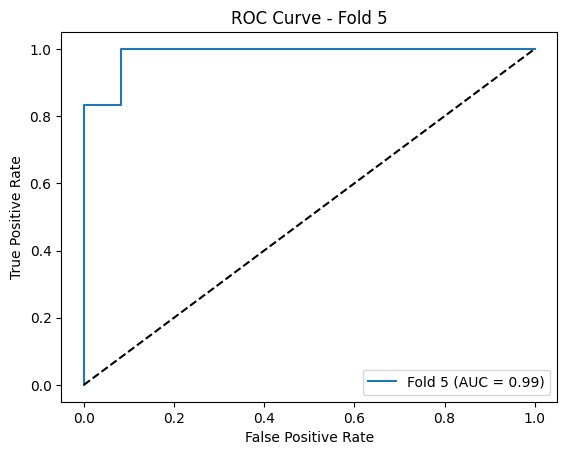


Média de Acurácia após Validação Cruzada: 0.8281
Média de Perda após Validação Cruzada: 0.5931
Média de F1-Score após Validação Cruzada: 0.5390
Média de AUC-ROC após Validação Cruzada: 0.9232
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.6469 - loss: 0.5800
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step

Acurácia no conjunto de teste: 0.6579
F1-Score no conjunto de teste: 0.0000
AUC-ROC no conjunto de teste: 0.7908


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.preprocessing import label_binarize

# Função para criar o modelo 13.1
def criar_modelo_13_1():
    model = models.Sequential([
        layers.InputLayer(input_shape=(250, 200, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Saída binária
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Preparação dos dados (conforme você tem X_train, y_train, X_val, y_val, X_test, y_test)
X_train = np.array(X_train)  # Dados de entrada para treinamento
y_train = np.array(y_train)  # Rótulos de treinamento
X_val = np.array(X_val)  # Dados de validação
y_val = np.array(y_val)  # Rótulos de validação
X_test = np.array(X_test)  # Dados de teste
y_test = np.array(y_test)  # Rótulos de teste

# Número de folds para a validação cruzada
k = 5  # Número de divisões dos dados
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Listas para armazenar as métricas de cada fold
acuracias = []
perdas = []
f1_scores = []
roc_aucs = []

# Iniciar o loop de validação cruzada
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"Treinando no Fold {fold + 1}")

    # Divida os dados de treino e validação para este fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Criar e treinar o modelo 13.1
    modelo = criar_modelo_13_1()  # Criação do modelo
    modelo.fit(X_train_fold, y_train_fold, epochs=10, batch_size=16, validation_data=(X_val_fold, y_val_fold))

    # Avaliar o modelo no conjunto de validação
    loss, accuracy = modelo.evaluate(X_val_fold, y_val_fold)
    acuracias.append(accuracy)
    perdas.append(loss)

    # Previsões no conjunto de validação
    y_val_pred = modelo.predict(X_val_fold)
    y_val_pred_classes = (y_val_pred > 0.5).astype("int32")  # Classe com maior probabilidade (0 ou 1)

    # Calcular o F1-Score
    f1 = f1_score(y_val_fold, y_val_pred_classes)
    f1_scores.append(f1)

    # Calcular o AUC-ROC
    y_val_fold_bin = label_binarize(y_val_fold, classes=[0, 1])  # Binarizar os rótulos
    fpr, tpr, _ = roc_curve(y_val_fold_bin, y_val_pred[:, 0])  # Calcular FPR e TPR
    roc_auc = auc(fpr, tpr)
    roc_aucs.append(roc_auc)

    # Plotar a curva ROC para cada fold
    plt.figure(fold)
    plt.plot(fpr, tpr, label=f'Fold {fold+1} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Fold {fold+1}')
    plt.legend(loc="lower right")
    plt.show()

# Calcular a média das métricas
media_acuracia = np.mean(acuracias)
media_perda = np.mean(perdas)
media_f1 = np.mean(f1_scores)
media_roc_auc = np.mean(roc_aucs)

print(f'\nMédia de Acurácia após Validação Cruzada: {media_acuracia:.4f}')
print(f'Média de Perda após Validação Cruzada: {media_perda:.4f}')
print(f'Média de F1-Score após Validação Cruzada: {media_f1:.4f}')
print(f'Média de AUC-ROC após Validação Cruzada: {media_roc_auc:.4f}')

# Opcional: Avaliar o modelo no conjunto de teste
test_loss, test_acc = modelo.evaluate(X_test, y_test)
test_pred = modelo.predict(X_test)
test_pred_classes = (test_pred > 0.5).astype("int32")

# Calcular F1-Score e AUC-ROC no conjunto de teste
test_f1 = f1_score(y_test, test_pred_classes)
test_y_test_bin = label_binarize(y_test, classes=[0, 1])
fpr_test, tpr_test, _ = roc_curve(test_y_test_bin, test_pred[:, 0])
test_roc_auc = auc(fpr_test, tpr_test)

print(f'\nAcurácia no conjunto de teste: {test_acc:.4f}')
print(f'F1-Score no conjunto de teste: {test_f1:.4f}')
print(f'AUC-ROC no conjunto de teste: {test_roc_auc:.4f}')


CÉLULA 15.2

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.preprocessing import label_binarize

# Função para criar o modelo 13.2
def criar_modelo_13_2():
    model = models.Sequential([
        layers.InputLayer(input_shape=(250, 200, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # Regularização com Dropout
        layers.Dense(1, activation='sigmoid')  # Saída binária
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Preparação dos dados (conforme você tem X_train, y_train, X_val, y_val, X_test, y_test)
X_train = np.array(X_train)  # Dados de entrada para treinamento
y_train = np.array(y_train)  # Rótulos de treinamento
X_val = np.array(X_val)  # Dados de validação
y_val = np.array(y_val)  # Rótulos de validação
X_test = np.array(X_test)  # Dados de teste
y_test = np.array(y_test)  # Rótulos de teste

# Número de folds para a validação cruzada
k = 5  # Número de divisões dos dados
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Listas para armazenar as métricas de cada fold
acuracias = []
perdas = []
f1_scores = []
roc_aucs = []

# Iniciar o loop de validação cruzada
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"Treinando no Fold {fold + 1}")

    # Divida os dados de treino e validação para este fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Criar e treinar o modelo 13.2
    modelo = criar_modelo_13_2()  # Criação do modelo
    modelo.fit(X_train_fold, y_train_fold, epochs=10, batch_size=16, validation_data=(X_val_fold, y_val_fold))

    # Avaliar o modelo no conjunto de validação
    loss, accuracy = modelo.evaluate(X_val_fold, y_val_fold)
    acuracias.append(accuracy)
    perdas.append(loss)

    # Previsões no conjunto de validação
    y_val_pred = modelo.predict(X_val_fold)
    y_val_pred_classes = (y_val_pred > 0.5).astype("int32")  # Classe com maior probabilidade (0 ou 1)

    # Calcular o F1-Score
    f1 = f1_score(y_val_fold, y_val_pred_classes)
    f1_scores.append(f1)

    # Calcular o AUC-ROC
    y_val_fold_bin = label_binarize(y_val_fold, classes=[0, 1])  # Binarizar os rótulos
    fpr, tpr, _ = roc_curve(y_val_fold_bin, y_val_pred[:, 0])  # Calcular FPR e TPR
    roc_auc = auc(fpr, tpr)
    roc_aucs.append(roc_auc)

    # Plotar a curva ROC para cada fold
    plt.figure(fold)
    plt.plot(fpr, tpr, label=f'Fold {fold+1} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Fold {fold+1}')
    plt.legend(loc="lower right")
    plt.show()

# Calcular a média das métricas
media_acuracia = np.mean(acuracias)
media_perda = np.mean(perdas)
media_f1 = np.mean(f1_scores)
media_roc_auc = np.mean(roc_aucs)

print(f'\nMédia de Acurácia após Validação Cruzada: {media_acuracia:.4f}')
print(f'Média de Perda após Validação Cruzada: {media_perda:.4f}')
print(f'Média de F1-Score após Validação Cruzada: {media_f1:.4f}')
print(f'Média de AUC-ROC após Validação Cruzada: {media_roc_auc:.4f}')

# Opcional: Avaliar o modelo no conjunto de teste
test_loss, test_acc = modelo.evaluate(X_test, y_test)
test_pred = modelo.predict(X_test)
test_pred_classes = (test_pred > 0.5).astype("int32")

# Calcular F1-Score e AUC-ROC no conjunto de teste
test_f1 = f1_score(y_test, test_pred_classes)
test_y_test_bin = label_binarize(y_test, classes=[0, 1])
fpr_test, tpr_test, _ = roc_curve(test_y_test_bin, test_pred[:, 0])
test_roc_auc = auc(fpr_test, tpr_test)

print(f'\nAcurácia no conjunto de teste: {test_acc:.4f}')
print(f'F1-Score no conjunto de teste: {test_f1:.4f}')
print(f'AUC-ROC no conjunto de teste: {test_roc_auc:.4f}')


CÉLULA 15.3 - usa-se mais camadas, com data agumentation, cross validation,

Treinando no Fold 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6342 - loss: 0.6541 - val_accuracy: 0.8421 - val_loss: 15.2284
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7639 - loss: 0.6046 - val_accuracy: 0.8421 - val_loss: 10.6470
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7105 - loss: 0.6797 - val_accuracy: 0.8421 - val_loss: 5.1885
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6641 - loss: 0.6893 - val_accuracy: 0.8421 - val_loss: 3.5118
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6618 - loss: 0.6863 - val_accuracy: 0.8421 - val_loss: 2.8048
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7217 - loss: 0.6792 - val_accuracy: 0.8421 - val_loss: 2.4469
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.7453 - loss: 0.6726 - val_accuracy: 0.8421 - val_loss: 2.2599
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7421 - loss: 0.6654 - val_accuracy: 0.8421 - val_loss: 2.1635
Epoch 9/15
5/5 ━━━

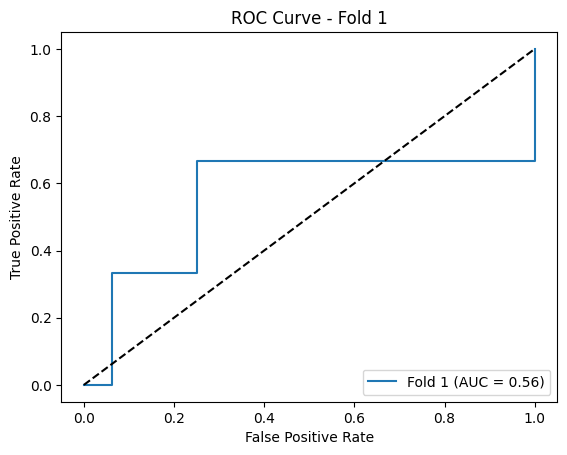

Treinando no Fold 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7149 - loss: 0.6754 - val_accuracy: 0.7895 - val_loss: 16.8957
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6389 - loss: 0.7149 - val_accuracy: 0.7895 - val_loss: 1.9649
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7723 - loss: 0.6742 - val_accuracy: 0.7895 - val_loss: 1.4258
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7104 - loss: 0.6134 - val_accuracy: 0.7895 - val_loss: 1.2594
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7053 - loss: 0.6228 - val_accuracy: 0.7895 - val_loss: 1.0880
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7174 - loss: 0.5857 - val_accuracy: 0.7895 - val_loss: 0.9810
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.6683 - loss: 0.6645 - val_accuracy: 0.7895 - val_loss: 0.9242
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7021 - loss: 0.6152 - val_accuracy: 0.7895 - val_loss: 0.9503
Epoch 9/15
5/5 ━━━━

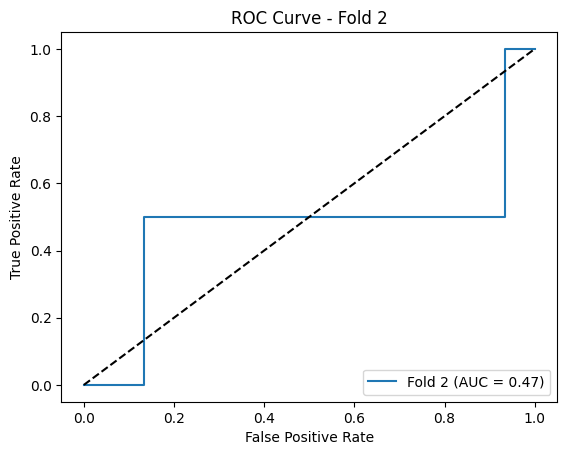

Treinando no Fold 3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6796 - loss: 0.6792 - val_accuracy: 0.7368 - val_loss: 17.8787
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6912 - loss: 0.6481 - val_accuracy: 0.7368 - val_loss: 15.9220
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.7384 - loss: 0.5734 - val_accuracy: 0.7368 - val_loss: 15.5782
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7322 - loss: 0.5924 - val_accuracy: 0.7368 - val_loss: 15.9729
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7431 - loss: 0.5817 - val_accuracy: 0.7368 - val_loss: 18.5572
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7112 - loss: 0.6317 - val_accuracy: 0.7368 - val_loss: 17.7028
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7225 - loss: 0.5740 - val_accuracy: 0.7368 - val_loss: 20.6584
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6957 - loss: 0.6686 - val_accuracy: 0.7368 - val_loss: 19.1427
Epoch 9/15
5

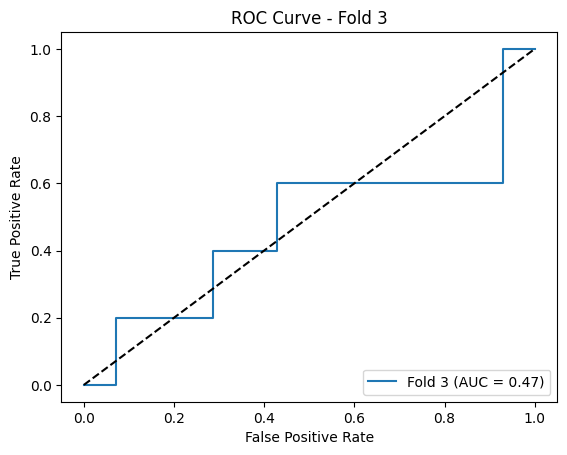

Treinando no Fold 4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6007 - loss: 0.6577 - val_accuracy: 0.6316 - val_loss: 30.1168
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7861 - loss: 0.5346 - val_accuracy: 0.6316 - val_loss: 20.3468
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7386 - loss: 0.6067 - val_accuracy: 0.6316 - val_loss: 19.1418
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7702 - loss: 0.5575 - val_accuracy: 0.6316 - val_loss: 17.4022
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7681 - loss: 0.5515 - val_accuracy: 0.6316 - val_loss: 13.1471
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.7807 - loss: 0.5880 - val_accuracy: 0.6316 - val_loss: 12.4314
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6917 - loss: 0.6369 - val_accuracy: 0.6316 - val_loss: 12.2541
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7826 - loss: 0.5517 - val_accuracy: 0.6316 - val_loss: 12.4868
Epoch 9/15
5

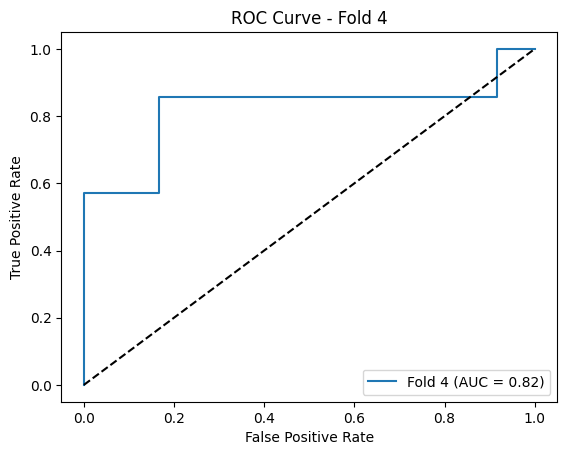

Treinando no Fold 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5124 - loss: 0.7493 - val_accuracy: 0.6667 - val_loss: 11.0802
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6924 - loss: 0.6477 - val_accuracy: 0.6667 - val_loss: 13.7143
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7559 - loss: 0.5674 - val_accuracy: 0.6667 - val_loss: 19.4626
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7344 - loss: 0.6190 - val_accuracy: 0.6667 - val_loss: 11.5056
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7037 - loss: 0.6137 - val_accuracy: 0.6667 - val_loss: 9.9545
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7200 - loss: 0.6005 - val_accuracy: 0.6667 - val_loss: 11.7136
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7527 - loss: 0.5472 - val_accuracy: 0.6667 - val_loss: 13.2746
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7959 - loss: 0.5014 - val_accuracy: 0.6667 - val_loss: 9.4813
Epoch 9/15
5/5 

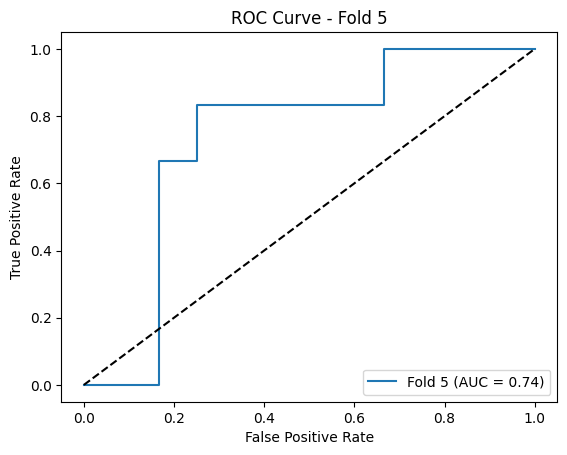


Média de Acurácia após Validação Cruzada: 0.7333
Média de Perda após Validação Cruzada: 8.1367
Média de F1-Score após Validação Cruzada: 0.0000
Média de AUC-ROC após Validação Cruzada: 0.6116
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.6469 - loss: 9.4073
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step

Acurácia no conjunto de teste: 0.6579
F1-Score no conjunto de teste: 0.0000
AUC-ROC no conjunto de teste: 0.6154


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import label_binarize

# Função para criar o modelo 13.3 com Dropout e Data Augmentation
def criar_modelo_13_3():
    model = models.Sequential([
        layers.InputLayer(input_shape=(250, 200, 3)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),  # Regularização Dropout

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),  # Regularização Dropout

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # Regularização Dropout
        layers.Dense(1, activation='sigmoid')  # Saída binária
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Função para aplicar o Data Augmentation
def criar_train_generator(X_train, y_train, batch_size=16):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Generator de treino com Data Augmentation
    return train_datagen.flow(X_train, y_train, batch_size=batch_size)

# Preparação dos dados
X_train = np.array(X_train)  # Dados de entrada para treinamento
y_train = np.array(y_train)  # Rótulos de treinamento
X_val = np.array(X_val)  # Dados de validação
y_val = np.array(y_val)  # Rótulos de validação
X_test = np.array(X_test)  # Dados de teste
y_test = np.array(y_test)  # Rótulos de teste

# Número de folds para a validação cruzada
k = 5  # Número de divisões dos dados
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Listas para armazenar as métricas de cada fold
acuracias = []
perdas = []
f1_scores = []
roc_aucs = []

# Iniciar o loop de validação cruzada
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"Treinando no Fold {fold + 1}")

    # Divida os dados de treino e validação para este fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Criar o generator de treino com Data Augmentation
    train_generator = criar_train_generator(X_train_fold, y_train_fold, batch_size=16)

    # Criar e treinar o modelo 13.3
    modelo = criar_modelo_13_3()  # Criação do modelo
    modelo.fit(train_generator, epochs=15, validation_data=(X_val_fold, y_val_fold))

    # Avaliar o modelo no conjunto de validação
    loss, accuracy = modelo.evaluate(X_val_fold, y_val_fold)
    acuracias.append(accuracy)
    perdas.append(loss)

    # Previsões no conjunto de validação
    y_val_pred = modelo.predict(X_val_fold)
    y_val_pred_classes = (y_val_pred > 0.5).astype("int32")  # Classe com maior probabilidade (0 ou 1)

    # Calcular o F1-Score
    f1 = f1_score(y_val_fold, y_val_pred_classes)
    f1_scores.append(f1)

    # Calcular o AUC-ROC
    y_val_fold_bin = label_binarize(y_val_fold, classes=[0, 1])  # Binarizar os rótulos
    fpr, tpr, _ = roc_curve(y_val_fold_bin, y_val_pred[:, 0])  # Calcular FPR e TPR
    roc_auc = auc(fpr, tpr)
    roc_aucs.append(roc_auc)

    # Plotar a curva ROC para cada fold
    plt.figure(fold)
    plt.plot(fpr, tpr, label=f'Fold {fold+1} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Fold {fold+1}')
    plt.legend(loc="lower right")
    plt.show()

# Calcular a média das métricas
media_acuracia = np.mean(acuracias)
media_perda = np.mean(perdas)
media_f1 = np.mean(f1_scores)
media_roc_auc = np.mean(roc_aucs)

print(f'\nMédia de Acurácia após Validação Cruzada: {media_acuracia:.4f}')
print(f'Média de Perda após Validação Cruzada: {media_perda:.4f}')
print(f'Média de F1-Score após Validação Cruzada: {media_f1:.4f}')
print(f'Média de AUC-ROC após Validação Cruzada: {media_roc_auc:.4f}')

# Opcional: Avaliar o modelo no conjunto de teste
test_loss, test_acc = modelo.evaluate(X_test, y_test)
test_pred = modelo.predict(X_test)
test_pred_classes = (test_pred > 0.5).astype("int32")

# Calcular F1-Score e AUC-ROC no conjunto de teste
test_f1 = f1_score(y_test, test_pred_classes)
test_y_test_bin = label_binarize(y_test, classes=[0, 1])
fpr_test, tpr_test, _ = roc_curve(test_y_test_bin, test_pred[:, 0])
test_roc_auc = auc(fpr_test, tpr_test)

print(f'\nAcurácia no conjunto de teste: {test_acc:.4f}')
print(f'F1-Score no conjunto de teste: {test_f1:.4f}')
print(f'AUC-ROC no conjunto de teste: {test_roc_auc:.4f}')


CÉLULA 15.4

Treinando no Fold 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.6274 - loss: 0.8010 - val_accuracy: 0.1579 - val_loss: 11.8777
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.9749 - loss: 0.1512 - val_accuracy: 0.1579 - val_loss: 9.8303
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9632 - loss: 0.1301 - val_accuracy: 0.1579 - val_loss: 8.6578
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 7s/step - accuracy: 0.9933 - loss: 0.1096 - val_accuracy: 0.1579 - val_loss: 8.0761
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.9894 - loss: 0.0987 - val_accuracy: 0.1579 - val_loss: 7.6103
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9828 - loss: 0.0913 - val_accuracy: 0.1579 - val_loss: 6.9380
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.9933 - loss: 0.0893 - val_accuracy: 0.1579 - val_loss: 5.9774
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9605 - loss: 0.1710 - val_accuracy: 0.1579 - val_loss: 5.2903
Epoch 9

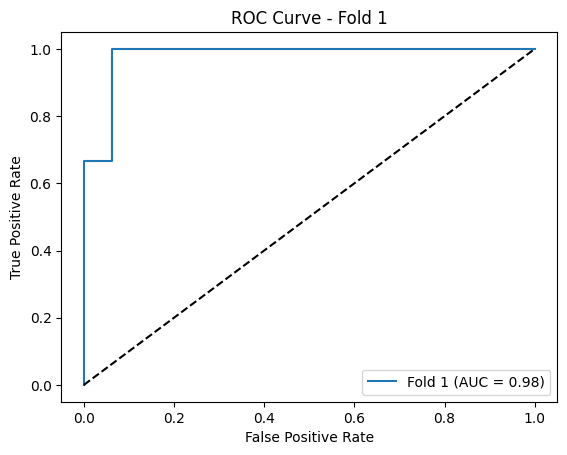

Treinando no Fold 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.6553 - loss: 0.8586 - val_accuracy: 0.8421 - val_loss: 0.5505
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.8786 - loss: 0.4474 - val_accuracy: 0.8947 - val_loss: 0.3845
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.9448 - loss: 0.2648 - val_accuracy: 0.7368 - val_loss: 0.5258
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.9632 - loss: 0.2157 - val_accuracy: 0.5263 - val_loss: 0.7191
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.9382 - loss: 0.2436 - val_accuracy: 0.3684 - val_loss: 0.8800
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.9076 - loss: 0.2471 - val_accuracy: 0.5789 - val_loss: 0.7441
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.9816 - loss: 0.1190 - val_accuracy: 0.6842 - val_loss: 0.7144
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9894 - loss: 0.1080 - val_accuracy: 0.5263 - val_loss: 0.8375
Epoch 9/

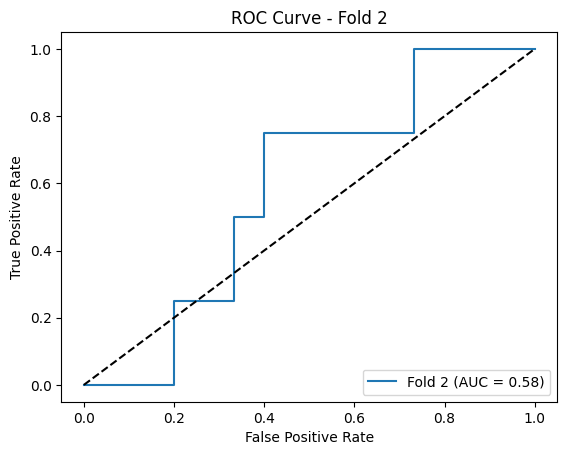

Treinando no Fold 3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.6268 - loss: 0.6291 - val_accuracy: 0.2632 - val_loss: 3.0416
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.9460 - loss: 0.1899 - val_accuracy: 0.2632 - val_loss: 3.8046
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.9816 - loss: 0.1836 - val_accuracy: 0.2632 - val_loss: 4.2093
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.9789 - loss: 0.1311 - val_accuracy: 0.2632 - val_loss: 4.1154
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.9867 - loss: 0.0721 - val_accuracy: 0.2632 - val_loss: 3.8920
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 1.0000 - loss: 0.0641 - val_accuracy: 0.2632 - val_loss: 3.2158
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9894 - loss: 0.0514 - val_accuracy: 0.2632 - val_loss: 2.3564
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 1.0000 - loss: 0.0377 - val_accuracy: 0.2632 - val_loss: 1.8026
Epoch 9/

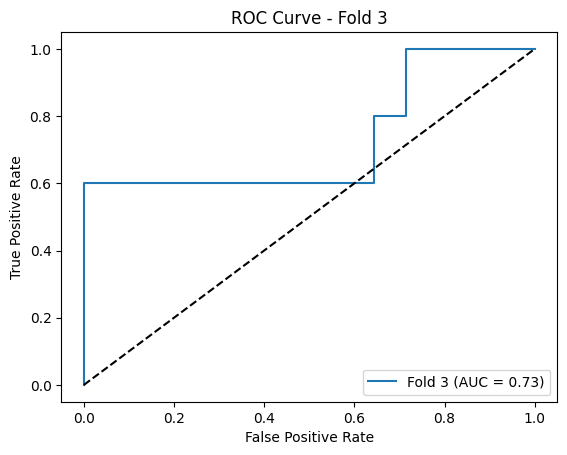

Treinando no Fold 4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.6435 - loss: 0.6842 - val_accuracy: 0.3684 - val_loss: 3.7066
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.9065 - loss: 0.3082 - val_accuracy: 0.3684 - val_loss: 3.4192
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.9159 - loss: 0.3448 - val_accuracy: 0.3684 - val_loss: 3.7452
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.9393 - loss: 0.1702 - val_accuracy: 0.3684 - val_loss: 3.9589
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.9710 - loss: 0.1530 - val_accuracy: 0.3684 - val_loss: 4.0314
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.9616 - loss: 0.1980 - val_accuracy: 0.3684 - val_loss: 3.7769
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.9816 - loss: 0.0806 - val_accuracy: 0.3684 - val_loss: 3.7230
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.9816 - loss: 0.1320 - val_accuracy: 0.3684 - val_loss: 3.3122
Epoch 9/

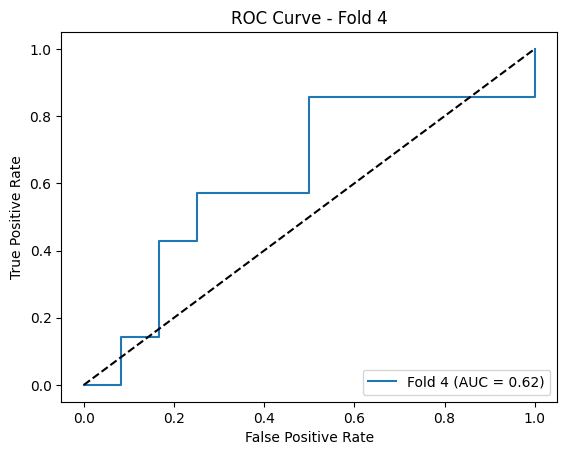

Treinando no Fold 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.6832 - loss: 0.6379 - val_accuracy: 0.9444 - val_loss: 0.1257
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.9268 - loss: 0.3143 - val_accuracy: 0.9444 - val_loss: 0.2903
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.9764 - loss: 0.1996 - val_accuracy: 0.7222 - val_loss: 0.5747
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.9712 - loss: 0.1959 - val_accuracy: 0.4444 - val_loss: 0.8381
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.9227 - loss: 0.2308 - val_accuracy: 0.3333 - val_loss: 1.2252
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.9817 - loss: 0.1622 - val_accuracy: 0.3333 - val_loss: 1.7914
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.9895 - loss: 0.1005 - val_accuracy: 0.3333 - val_loss: 2.3637
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.9725 - loss: 0.1032 - val_accuracy: 0.3333 - val_loss: 2.7238
Epoch 9/

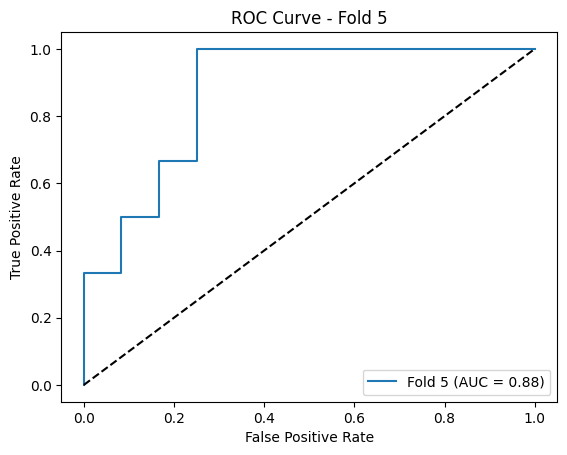


Média de Acurácia após Validação Cruzada: 0.4140
Média de Perda após Validação Cruzada: 1.2763
Média de F1-Score após Validação Cruzada: 0.4467
Média de AUC-ROC após Validação Cruzada: 0.7570
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.3531 - loss: 2.2727
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step

Acurácia no conjunto de teste: 0.3421
F1-Score no conjunto de teste: 0.5098
AUC-ROC no conjunto de teste: 0.6523


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.preprocessing import label_binarize

# Função para criar o modelo 13.4 com Batch Normalization
def criar_modelo_13_4():
    model = models.Sequential([
        layers.InputLayer(input_shape=(250, 200, 3)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(),  # Normalização das ativações
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),  # Normalização das ativações
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),  # Normalização das ativações
        layers.Dense(1, activation='sigmoid')  # Saída binária
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Preparação dos dados
X_train = np.array(X_train)  # Dados de entrada para treinamento
y_train = np.array(y_train)  # Rótulos de treinamento
X_val = np.array(X_val)  # Dados de validação
y_val = np.array(y_val)  # Rótulos de validação
X_test = np.array(X_test)  # Dados de teste
y_test = np.array(y_test)  # Rótulos de teste

# Número de folds para a validação cruzada
k = 5  # Número de divisões dos dados
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Listas para armazenar as métricas de cada fold
acuracias = []
perdas = []
f1_scores = []
roc_aucs = []

# Iniciar o loop de validação cruzada
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"Treinando no Fold {fold + 1}")

    # Divida os dados de treino e validação para este fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Criar e treinar o modelo 13.4
    modelo = criar_modelo_13_4()  # Criação do modelo
    modelo.fit(X_train_fold, y_train_fold, epochs=15, batch_size=32, validation_data=(X_val_fold, y_val_fold))

    # Avaliar o modelo no conjunto de validação
    loss, accuracy = modelo.evaluate(X_val_fold, y_val_fold)
    acuracias.append(accuracy)
    perdas.append(loss)

    # Previsões no conjunto de validação
    y_val_pred = modelo.predict(X_val_fold)
    y_val_pred_classes = (y_val_pred > 0.5).astype("int32")  # Classe com maior probabilidade (0 ou 1)

    # Calcular o F1-Score
    f1 = f1_score(y_val_fold, y_val_pred_classes)
    f1_scores.append(f1)

    # Calcular o AUC-ROC
    y_val_fold_bin = label_binarize(y_val_fold, classes=[0, 1])  # Binarizar os rótulos
    fpr, tpr, _ = roc_curve(y_val_fold_bin, y_val_pred[:, 0])  # Calcular FPR e TPR
    roc_auc = auc(fpr, tpr)
    roc_aucs.append(roc_auc)

    # Plotar a curva ROC para cada fold
    plt.figure(fold)
    plt.plot(fpr, tpr, label=f'Fold {fold+1} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Fold {fold+1}')
    plt.legend(loc="lower right")
    plt.show()

# Calcular a média das métricas
media_acuracia = np.mean(acuracias)
media_perda = np.mean(perdas)
media_f1 = np.mean(f1_scores)
media_roc_auc = np.mean(roc_aucs)

print(f'\nMédia de Acurácia após Validação Cruzada: {media_acuracia:.4f}')
print(f'Média de Perda após Validação Cruzada: {media_perda:.4f}')
print(f'Média de F1-Score após Validação Cruzada: {media_f1:.4f}')
print(f'Média de AUC-ROC após Validação Cruzada: {media_roc_auc:.4f}')

# Opcional: Avaliar o modelo no conjunto de teste
test_loss, test_acc = modelo.evaluate(X_test, y_test)
test_pred = modelo.predict(X_test)
test_pred_classes = (test_pred > 0.5).astype("int32")

# Calcular F1-Score e AUC-ROC no conjunto de teste
test_f1 = f1_score(y_test, test_pred_classes)
test_y_test_bin = label_binarize(y_test, classes=[0, 1])
fpr_test, tpr_test, _ = roc_curve(test_y_test_bin, test_pred[:, 0])
test_roc_auc = auc(fpr_test, tpr_test)

print(f'\nAcurácia no conjunto de teste: {test_acc:.4f}')
print(f'F1-Score no conjunto de teste: {test_f1:.4f}')
print(f'AUC-ROC no conjunto de teste: {test_roc_auc:.4f}')


CÉLULA 15.5 - **ELIMINADO POR FALTA DE MEMÓRIA RAM E BAIXO DESEMPENHO NO TREINO**

CÉLULA 15.6 - **ELIMINADO POR FALTA DE MEMÓRIA RAM E BAIXO DESEMPENHO NO TREINO**

CÉLULA 15.7 - **ELIMINADO POR FALTA DE MEMÓRIA RAM E BAIXO DESEMPENHO NO TREINO**


CÉLULA 16.1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5964 - loss: 4.4819 - val_accuracy: 0.7321 - val_loss: 1.5836
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7108 - loss: 1.7703 - val_accuracy: 0.4107 - val_loss: 0.6941
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8079 - loss: 0.4398 - val_accuracy: 0.7500 - val_loss: 0.6079
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8378 - loss: 0.3971 - val_accuracy: 0.7500 - val_loss: 0.5726
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8954 - loss: 0.3190 - val_accuracy: 0.7500 - val_loss: 0.5803
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9107 - loss: 0.2532 - val_accuracy: 0.7143 - val_loss: 0.5664
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.8918 - loss: 0.1770 - val_accuracy: 0.5357 - val_loss: 0.6492
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9568 - loss: 0.1373 - val_accuracy: 0.7321 - val_loss: 0.5788
Epoch 9/

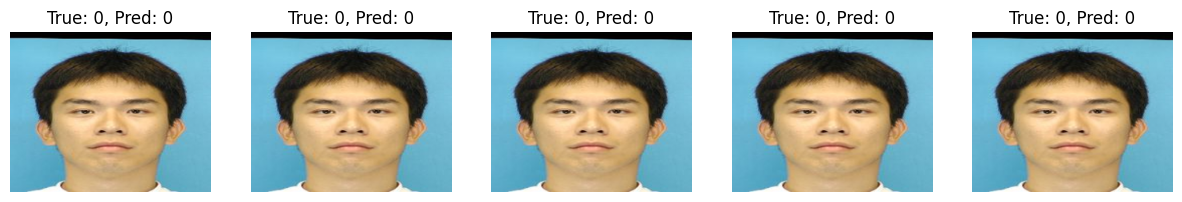

Imagem indexada 0:
Classe verdadeira: 0, Classe predita: 0


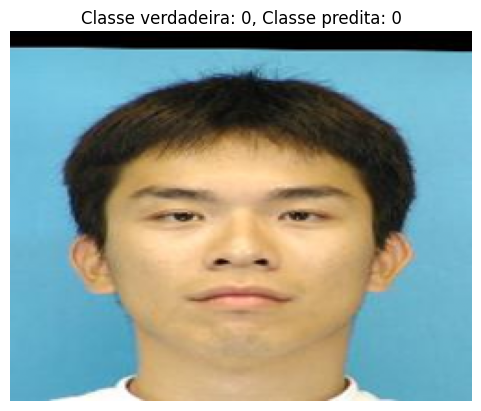

Imagem indexada 0:
Classe verdadeira: 0, Classe predita: 0


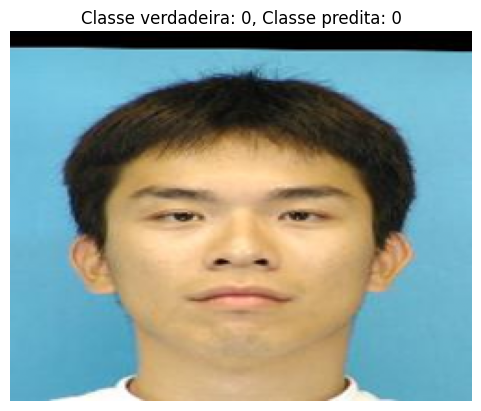

Imagem indexada 0:
Classe verdadeira: 0, Classe predita: 0


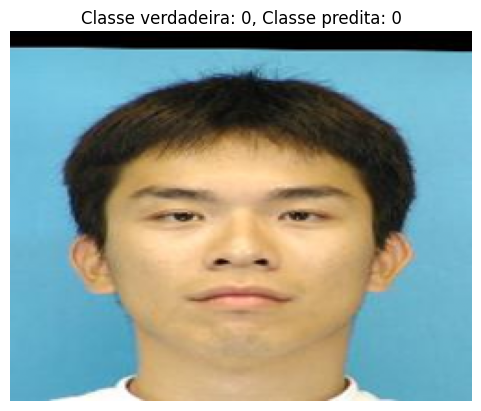

Imagem indexada 0:
Classe verdadeira: 0, Classe predita: 0


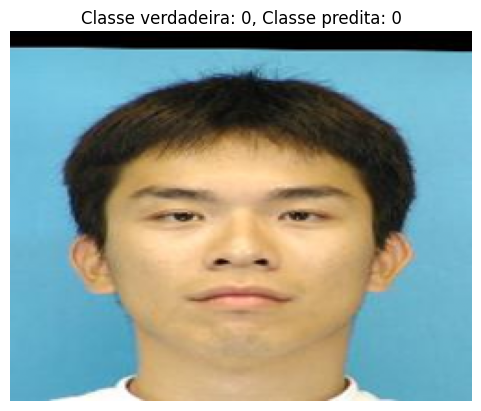

Imagem indexada 0:
Classe verdadeira: 0, Classe predita: 0


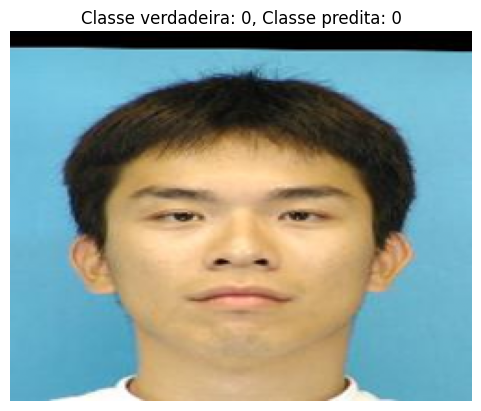

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Função para criar o modelo 13.2
def criar_modelo_13_2():
    model = Sequential([
        layers.InputLayer(input_shape=(250, 200, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # Regularização com Dropout
        layers.Dense(1, activation='sigmoid')  # Saída binária
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Carregar ou treinar o modelo
model_15_2 = criar_modelo_13_2()

# Aqui, ajustamos o modelo aos dados de treino com validação cruzada
history = model_15_2.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val))

# Passo 1: Obter as previsões do modelo para o conjunto de teste
y_pred = model_15_2.predict(X_test)  # Probabilidades preditas
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convertendo as probabilidades para classes binárias

# Passo 2: Identificar as previsões erradas
incorrect_idx = np.where(y_pred_classes != y_test)[0]  # Índices onde as previsões estão incorretas

# Passo 3: Visualizar as imagens classificadas incorretamente
def plot_incorrect_images(incorrect_idx, X_test, y_test, y_pred_classes, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i, idx in enumerate(incorrect_idx[:num_images]):  # Visualizando as primeiras 'num_images' imagens erradas
        ax = axes[i]
        ax.imshow(X_test[idx])  # Imagem do teste
        ax.set_title(f"True: {y_test[idx]}, Pred: {y_pred_classes[idx][0]}")
        ax.axis('off')

    plt.show()

# Mostrar as 5 primeiras imagens incorretamente classificadas
plot_incorrect_images(incorrect_idx, X_test, y_test, y_pred_classes, num_images=5)

# Passo 4: Análise dos erros
def analyze_errors(incorrect_idx, X_test, y_test, y_pred_classes):
    for idx in incorrect_idx:
        true_class = y_test[idx]
        predicted_class = y_pred_classes[idx]
        print(f"Imagem indexada {idx}:")
        print(f"Classe verdadeira: {true_class}, Classe predita: {predicted_class[0]}")
        # Exemplo de análise visual
        plt.imshow(X_test[idx])
        plt.title(f"Classe verdadeira: {true_class}, Classe predita: {predicted_class[0]}")
        plt.axis('off')
        plt.show()

# Análise dos primeiros erros
analyze_errors(incorrect_idx[:5], X_test, y_test, y_pred_classes)


O modelo **não cometeu erros** com o conjunto de dados utilizado, como mostrado nos logs (onde a classe predita é sempre a mesma que a verdadeira), isso pode indicar que o modelo está apresentando um **desempenho bastante bom** no conjunto de teste, ou talvez que **o conjunto de validação/teste não contenha exemplos suficientemente difíceis** para o modelo.

CÉLULA 16.2

F1-Score: 0.7407
AUC (Área sob a curva ROC): 0.8923
Limiar de cada ponto da curva ROC:
Limiar 1: inf, FPR: 0.0000, TPR: 0.0000
Limiar 2: 0.9997, FPR: 0.0000, TPR: 0.0769
Limiar 3: 0.9978, FPR: 0.0000, TPR: 0.3846
Limiar 4: 0.9949, FPR: 0.0400, TPR: 0.3846
Limiar 5: 0.9948, FPR: 0.0400, TPR: 0.4615
Limiar 6: 0.9719, FPR: 0.1200, TPR: 0.4615
Limiar 7: 0.7187, FPR: 0.1200, TPR: 0.7692
Limiar 8: 0.2069, FPR: 0.2800, TPR: 0.7692
Limiar 9: 0.0934, FPR: 0.2800, TPR: 0.9231
Limiar 10: 0.0467, FPR: 0.3200, TPR: 0.9231
Limiar 11: 0.0308, FPR: 0.3200, TPR: 1.0000
Limiar 12: 0.0000, FPR: 1.0000, TPR: 1.0000


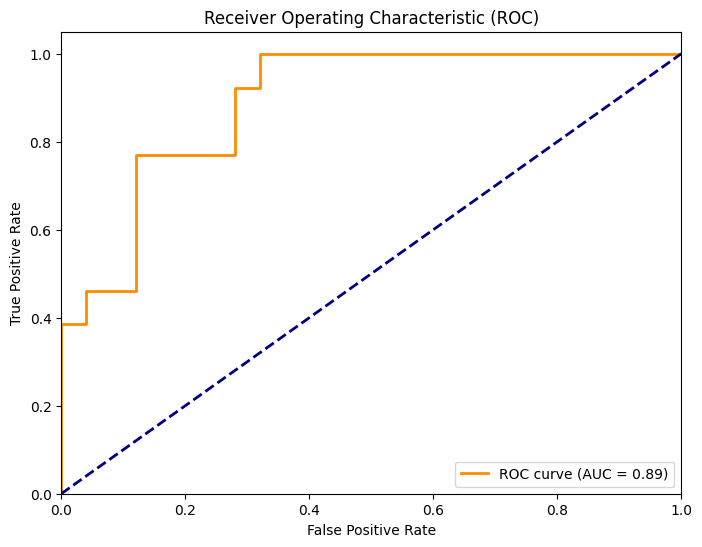


Resumo final das métricas:
F1-Score: 0.7407
AUC: 0.8923


In [ ]:
from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# 1. Calcular o F1-Score
f1 = f1_score(y_test, y_pred_classes)
print(f"F1-Score: {f1:.4f}")

# 2. Calcular a curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# 3. Print da AUC
print(f"AUC (Área sob a curva ROC): {roc_auc:.4f}")

# 4. Exibir os limiares (thresholds)
print("Limiar de cada ponto da curva ROC:")
for i in range(len(thresholds)):
    print(f"Limiar {i+1}: {thresholds[i]:.4f}, FPR: {fpr[i]:.4f}, TPR: {tpr[i]:.4f}")

# 5. Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Exibir no terminal
print("\nResumo final das métricas:")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {roc_auc:.4f}")


O modelo tem um bom desempenho geral com **AUC de 0.8923** e um **F1-Score de 0.7407**. Ele apresenta falsos positivos e negativos em alguns limiares.